In [ ]:
# ### First Step is to Import Libraries


import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 170)
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:
# 1: IMPORTING THE DATA to DATAFRAME - basic first step
# Reading the dataset from the csv file

leads = pd.read_csv(r'C:\Users\LENOVO\Desktop\DATA SCIENCES\Leads.csv')

In [ ]:
# Inspecting all columns/header in the dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
# Inspecting all columns/trailer in the dataset
leads.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [ ]:
# Inspect the shape of the dataset
leads.shape

(9240, 37)

In [ ]:
# Inspect the different columns in the dataset
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
# Check the summary of the dataset
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [ ]:
# Verifying the Values
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Looks like there are quite a few categorical variables present in this dataset for which we will need to create dummy variables. Also, there are a lot of null values present as well, so we will need to treat them accordingly.

# Step 1: Data Cleaning and Preparation

In [ ]:
# check the number of missing value in the dataset
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [ ]:
# Drop all the columns in which greater than 3000 missing values are present

for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col, 1, inplace=True)

In [ ]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [ ]:
leads.drop(['City'], axis = 1, inplace = True)

In [ ]:
leads.drop(['Country'], axis = 1, inplace = True)

In [ ]:
# Lets now check the percentage of the missing values

round(100*(leads.isnull().sum()/len(leads.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [ ]:
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [ ]:
#In the below step we are getting the  value counts of all the columns

for column in leads:
    print(leads[column].astype('category').value_counts())
    print('___________________________________________________')

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

The following three columns now have the level 'Select'

In [ ]:
leads['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [ ]:
leads['How did you hear about X Education'].astype('category').value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [ ]:
leads['Specialization'].astype('category').value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [ ]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [ ]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [ ]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [ ]:
leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

In [ ]:
leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Only dropping the null rows for the column What is you current occupation.

In [ ]:
leads = leads[~pd.isnull(leads['What is your current occupation'])]

In [ ]:
leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

Dropping the Total visits

In [ ]:
leads = leads[~pd.isnull(leads['TotalVisits'])]

In [ ]:
leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

Dropping the Lead Source

In [ ]:
leads = leads[~pd.isnull(leads['Lead Source'])]

In [ ]:
leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [ ]:
# Drop the Specialization
leads = leads[~pd.isnull(leads['Specialization'])]

In [ ]:
leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

All null values of the data has been removed and now checking the percentage of rows that we have retained.

In [ ]:
print(len(leads.index))
print(len(leads.index)/9240)

6373
0.6897186147186147


we still have 69% of the rows which is enough

In [ ]:
# let look at the dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


 Prospect ID and Lead Number won't be of any use in the analysis, dropping them as well

In [ ]:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [ ]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


# Dummy variable creation
The below process is all categorical variables.


In [ ]:
# Check the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == 'object']
temp.columns

In [ ]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [ ]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
dummy_spl = dummy_spl.drop(['Specialization_Select'], 1)
leads = pd.concat([leads, dummy_spl], axis = 1)

In [ ]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [ ]:
Looking at the datset again to make sure that all is well

leads.head()

# Test-Train Split




In [7]:
# import the required library

from sklearn.model_selection import train_test_split

In [ ]:
# Put all the feature variables in X
X = leads.drop(['Converted'], 1)
X.head()

In [ ]:
# Put the target variable in Y
Y = leads['Converted']
Y.head()

In [ ]:
# Split the data into 70% train and 30% test dataset
X_train, X_test,Y_train, Y_test = train_test_split(X,Y, train_size = 0.7, test_size = 0.3, random_state = 100)

# Scaling process is as below




In [ ]:
# Import MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Looking at the correlations

Let's now look at the correlations. Since the number of variables are pretty high.


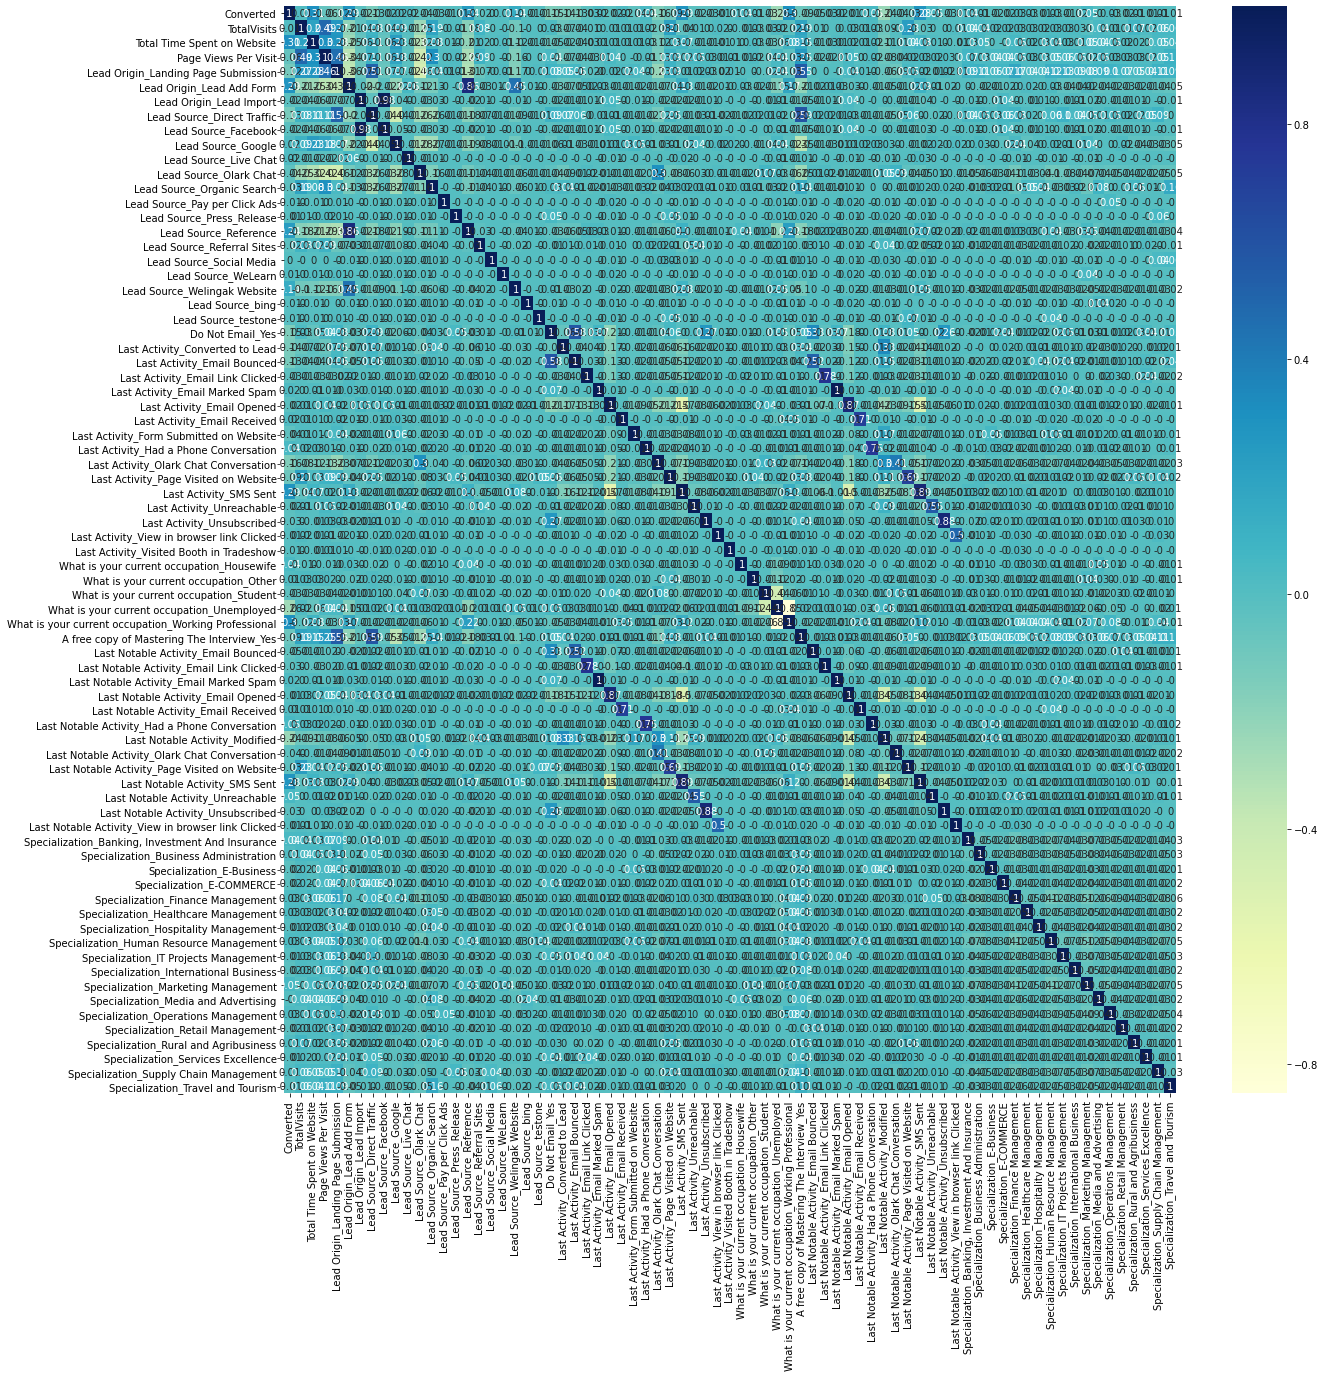

In [ ]:
# Let look at the correlations
import matplotlib.pyplot as plt
import seaborn as sns
leads_corr = round(leads.corr(),2)
plt.figure(figsize=(20,20))
sns.heatmap(leads_corr, annot=True, cmap='YlGnBu')
plt.show()

In [ ]:
# Looking at the correlation table

leads.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Converted,1.000000,0.005651,0.313338,-0.063362,-0.117563,0.288666,-0.019269,-0.133600,-0.021207,0.020205,...,-0.005689,-0.024789,0.049520,-0.000862,0.031349,-0.018603,0.006964,-0.005142,0.005785,-0.011762
TotalVisits,0.005651,1.000000,0.202551,0.489039,0.267954,-0.208375,-0.043000,0.075252,-0.042052,0.085306,...,0.025182,0.028630,-0.000493,0.038725,0.008929,0.014223,0.068015,0.015114,0.063383,0.064384
Total Time Spent on Website,0.313338,0.202551,1.000000,0.303870,0.275606,-0.249493,-0.061429,0.114088,-0.060945,0.227496,...,0.025526,0.011056,0.052437,0.043356,0.050860,0.024919,0.018767,0.003203,0.045386,0.037867
Page Views Per Visit,-0.063362,0.489039,0.303870,1.000000,0.458168,-0.340185,-0.065739,0.109785,-0.062896,0.183735,...,0.062421,0.057990,0.017799,0.063772,0.030364,0.026099,0.027465,0.015230,0.052972,0.111284
Lead Origin_Landing Page Submission,-0.117563,0.267954,0.275606,0.458168,1.000000,-0.363764,-0.074917,0.508857,-0.071507,0.067225,...,0.133206,0.089105,0.084975,0.093730,0.095849,0.070983,0.050077,0.039433,0.111610,0.094875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,-0.018603,0.014223,0.024919,0.026099,0.070983,-0.025339,-0.007261,0.022168,-0.007395,0.021190,...,-0.023773,-0.016437,-0.037930,-0.017920,-0.028459,1.000000,-0.010668,-0.006986,-0.023639,-0.017223
Specialization_Rural and Agribusiness,0.006964,0.068015,0.018767,0.027465,0.050077,-0.018872,-0.006251,0.021596,-0.006366,-0.037642,...,-0.020467,-0.014152,-0.032656,-0.015429,-0.024501,-0.010668,1.000000,-0.006014,-0.020352,-0.014828
Specialization_Services Excellence,-0.005142,0.015114,0.003203,0.015230,0.039433,-0.011155,-0.004093,0.053189,-0.004169,-0.027058,...,-0.013403,-0.009267,-0.021384,-0.010103,-0.016044,-0.006986,-0.006014,1.000000,-0.013327,-0.009710
Specialization_Supply Chain Management,0.005785,0.063383,0.045386,0.052972,0.111610,-0.035065,-0.001963,0.093536,-0.002431,-0.027074,...,-0.045353,-0.031358,-0.072362,-0.034188,-0.054292,-0.023639,-0.020352,-0.013327,1.000000,-0.032857


# Step 2: Model Building

selecting a small set of features from this pool of variables using RFE.


In [ ]:
# import LogisticRegression and create a LogisticRegression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
# import RFE and selected 15 variables from it

from sklearn.feature_selection import RFE
rfe = RFE(logreg,15)       # Ensuring 15 variables
rfe = rfe.fit(X_train, Y_train)

In [ ]:
# let look at which features have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Direct Traffic', False, 23),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 42),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 41),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 57),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 32),
 ('Lead Source_testone', False, 34),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 8),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Cl

In [ ]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]



Now you have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.


In [ ]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [ ]:
# import statsmodels

import statsmodels.api as sm

In [ ]:
# Fit a logistic Regression model on X_train after adding a constant and output and summary
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Sun, 06 Sep 2020   Deviance:                       4145.5
Time:                        15:34:29   Pearson chi2:                 4.84e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

Few variable which have a p-value greater than 0.05. We will need to take care of them. But first, let's also look at the VIFs.

In [ ]:
# impot Variance_inflation_factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# let look at the VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.19
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56




VIFs seem to be in a decent range except for three variables.

Let's first drop the variable Lead Source_Reference since it has a high p-value as well as a high VIF.


In [ ]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [ ]:
# Refit the model with the new set of features

logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Sun, 06 Sep 2020   Deviance:                       4146.5
Time:                        15:38:27   Pearson chi2:                 4.82e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [ ]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [ variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with Last Notable Activity_Had a Phone Conversation.

In [ ]:
X_train.drop(['Last Notable Activity_Had a Phone Conversation'], axis = 1, inplace = True)

In [ ]:
# Refit the model with the new set of features

logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Sun, 06 Sep 2020   Deviance:                       4152.2
Time:                        15:52:19   Pearson chi2:                 4.82e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

Drop What is your current occupation_Housewife.

In [ ]:
X_train.drop(['What is your current occupation_Housewife'], axis = 1, inplace = True)

In [ ]:
# again refit the model with new features
logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Sun, 06 Sep 2020   Deviance:                       4156.7
Time:                        15:57:38   Pearson chi2:                 4.83e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

Drop What is your current occupation_Working Professional.

In [ ]:
X_train.drop(['What is your current occupation_Working Professional'], axis = 1, inplace = True)

In [ ]:
# Refit the model with the new set of features
logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Sun, 06 Sep 2020   Deviance:                       4158.1
Time:                        16:02:06   Pearson chi2:                 4.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

All the p-values are now in the appropriate range. Let's also check the VIFs again in case we had missed something.

In [ ]:
# creates a vif dataframes
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] =[variance_inflation_factor(X_train.values, i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


 we are good at the VIF values

# Step 3: Model Evaluation

The p-values and VIFs seem decent enough for all the variables.


In [ ]:
#use 'Predict' to predict the probabilities on the train set
Y_train_pred = res.predict(X_train_sm)
Y_train_pred[:10]

8003    0.299132
218     0.141834
4171    0.127602
4037    0.291679
3660    0.956262
207     0.194437
2044    0.177750
6411    0.952857
6498    0.075665
2085    0.982340
dtype: float64

In [ ]:
# Reshaping it into an array

Y_train_pred = Y_train_pred.values.reshape(-1)
Y_train_pred[:10]

array([0.29913183, 0.14183438, 0.12760155, 0.29167908, 0.95626237,
       0.19443676, 0.17775018, 0.95285672, 0.07566484, 0.98233985])

Creating a dataframe with the actual conversion flag and the predicted probabilities

In [ ]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

Y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 'Conversion_Prob':Y_train_pred})
Y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.299132
1,0,0.141834
2,1,0.127602
3,1,0.291679
4,1,0.956262


Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [ ]:
Y_train_pred_final['Predicted'] = Y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
Y_train_pred_final.head()


,Converted,Conversion_Prob,Predicted
0,0,0.299132,0
1,0,0.141834,0
2,1,0.127602,0
3,1,0.291679,0
4,1,0.956262,1




Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.


In [ ]:
# import metrics form sklearn for evaluation

from sklearn import metrics 

In [ ]:
# created confusion matrix

confusion = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.Predicted)
print(confusion)

[[1932  380]
 [ 562 1587]]


In [ ]:
# Lets check the overall accuaracy

print(metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.Predicted))

0.788836583725622


In [ ]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# calculate the sensitivity
TP/(TP+FN)


0.7384830153559795

In [ ]:
# calculate the specificity
TN/(TN+FP)

0.8356401384083045


Finding the Optimal Cutoff

In [ ]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final.Converted, Y_train_pred_final.Conversion_Prob, drop_intermediate = False )

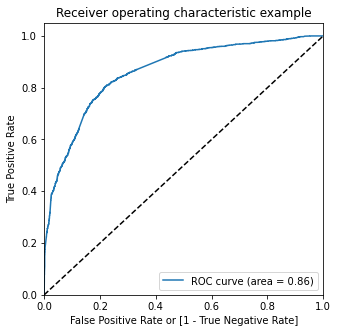

In [ ]:
# Call the ROC function

draw_roc(Y_train_pred_final.Converted, Y_train_pred_final.Conversion_Prob)



The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.


In [ ]:
# Let's create columns with different probability cutoffs 

numbers = [float(X)/10 for X in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.299132,0,1,1,1,0,0,0,0,0,0,0
1,0,0.141834,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127602,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291679,0,1,1,1,0,0,0,0,0,0,0
4,1,0.956262,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.527460  0.994416  0.093426
0.2   0.2  0.698274  0.944160  0.469723
0.3   0.3  0.767317  0.865054  0.676471
0.4   0.4  0.791975  0.809214  0.775952
0.5   0.5  0.788837  0.738483  0.835640
0.6   0.6  0.757229  0.622615  0.882353
0.7   0.7  0.735485  0.542113  0.915225
0.8   0.8  0.712620  0.454165  0.952855
0.9   0.9  0.646492  0.284318  0.983131


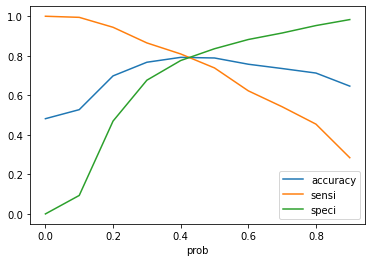

In [ ]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.42, you get the optimal values of the three metrics. So let's choose 0.42 as our cutoff now.

In [ ]:
Y_train_pred_final['final_predicted'] = Y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

Y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.299132,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.141834,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127602,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291679,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.956262,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)

0.7906299036090563

In [ ]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted )
confusion2

array([[1824,  488],
       [ 446, 1703]], dtype=int64)

In [ ]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives



In [ ]:
# Calcualte the sensitivity
TP/(TP+FN)

0.7924616100511866

In [ ]:
# Calcualte the specificity
TN/(TN+FP)

0.7889273356401384

This cutoff point seems good to go

# Step 4: Making Predictions is as below on the test set




In [ ]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [ ]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

In [ ]:
X_test_sm = sm.add_constant(X_test[col])

In [ ]:

X_test_sm

In [ ]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

Y_test_pred = res.predict(X_test_sm)

In [ ]:
Y_test_pred[:10]

In [ ]:
# Converting y_pred to a dataframe

Y_pred_1 = pd.DataFrame(Y_test_pred)

In [ ]:
Y_pred_1.head()

In [ ]:
Y_pred_1.tail()

In [ ]:
# Converting y_test to dataframe

Y_test_df = pd.DataFrame(Y_test)

In [ ]:
# Remove index for both dataframes to append them side by side 

Y_pred_1.reset_index(drop=True, inplace=True)
Y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
# Append Y_test_df and Y_pred_1

Y_pred_final = pd.concat([Y_test_df, Y_pred_1],axis=1)

In [ ]:
Y_pred_final.head()

In [ ]:
# Rename the column 

Y_pred_final= Y_pred_final.rename(columns = {0 : 'Conversion_Prob'})


In [ ]:
Y_pred_final.head()

In [ ]:
# Make predictions on the test set using 0.45 as the cutoff

Y_pred_final['final_predicted'] = Y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.45 else 0)

In [ ]:
Y_pred_final.head()

In [ ]:
# Let's check the overall accuracy

metrics.accuracy_score(Y_pred_final['Converted'], Y_pred_final.final_predicted)

In [ ]:
confusion2 = metrics.confusion_matrix(Y_pred_final['Converted'], Y_pred_final.final_predicted )
confusion2


In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives


In [ ]:
# Calculate sensitivity
TP / float(TP+FN)

In [ ]:
# Calculate specificity
TN / float(TN+FP)


# Precision-Recall View




In [ ]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.Predicted )
confusion



array([[1932,  380],
       [ 562, 1587]], dtype=int64)

# Precision

TP / TP + FP


In [ ]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8068124046771734

# Recall

TP / TP + FN


In [ ]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7384830153559795

# Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

Y_train_pred_final.Converted, Y_train_pred_final.Predicted


(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [ ]:
p, r, thresholds = precision_recall_curve(Y_train_pred_final.Converted, Y_train_pred_final.Conversion_Prob)

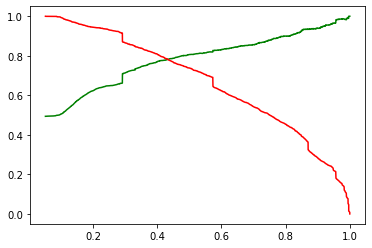

In [ ]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [ ]:

Y_train_pred_final['final_predicted'] = Y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

Y_train_pred_final.head()



,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.299132,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.141834,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127602,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291679,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.956262,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:

# Let's check the accuracy now

metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted)



0.7897332436673392

In [ ]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.final_predicted )
confusion2

array([[1856,  456],
       [ 482, 1667]], dtype=int64)

In [ ]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Calculate Precision

TP/(TP+FP)

0.785209609043806

In [ ]:
# Calculate Recall

TP/(TP+FN)

0.7757096323871568

# Step 4: Making Predictions on the Test Set




In [ ]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

y_test_pred[:10]

4771    0.996661
6122    0.130047
9202    0.703675
6570    0.298726
2668    0.721130
4233    0.802832
3368    0.704579
9091    0.465862
5972    0.281714
3631    0.786511
dtype: float64

In [ ]:
# Converting y_pred to a dataframe

Y_pred_1 = pd.DataFrame(Y_test_pred)
Y_pred_1.head()

,0
4771,0.996661
6122,0.130047
9202,0.703675
6570,0.298726
2668,0.721130


In [ ]:
# Converting Y_test to dataframe
Y_test_df = pd.DataFrame(Y_test)

In [ ]:
# Remove index for both dataframes to append them side by side 

Y_pred_1.reset_index(drop=True, inplace=True)
Y_test_df.reset_index(drop=True, inplace=True)



In [ ]:
Y_pred_final = pd.concat([Y_test_df, Y_pred_1],axis=1)

In [ ]:
Y_pred_final.head()

,Converted,0
0,1,0.996661
1,0,0.130047
2,0,0.703675
3,1,0.298726
4,1,0.721130


In [ ]:
# Rename the column 

Y_pred_final= Y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [ ]:
# Let's see the head of y_pred_final

Y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996661
1,0,0.130047
2,0,0.703675
3,1,0.298726
4,1,0.721130


In [ ]:
# Make predictions on the test set using 0.4 as the cutoff

Y_pred_final['final_predicted'] = Y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.46 else 0)
Y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996661,1
1,0,0.130047,0
2,0,0.703675,1
3,1,0.298726,0
4,1,0.721130,1


In [ ]:
# Let's check the overall accuracy

metrics.accuracy_score(Y_pred_final['Converted'], Y_pred_final.final_predicted)

0.7860878661087866

In [ ]:
confusion2 = metrics.confusion_matrix(Y_pred_final['Converted'], Y_pred_final.final_predicted )
confusion2

array([[812, 184],
       [225, 691]], dtype=int64)

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [ ]:
# Calculate Precision

TP/(TP+FP)

0.7897142857142857

In [ ]:
# Calculate Recall

TP/(TP+FN)

0.7543668122270742